# ELETRIC POWER MODELING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('AEP_hourly.csv')
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
df.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [22]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Tambahkan kolom tanggal saja
df['Date'] = df['Datetime'].dt.date

# Hitung total konsumsi per hari
df = df.groupby('Date')['AEP_MW'].sum().reset_index()

# Rename kolom agar lebih jelas
df.rename(columns={'AEP_MW': 'Total_AEP_MW'}, inplace=True)

# Preview hasil
print(df.head())

         Date  Total_AEP_MW
0  2004-10-01      328544.0
1  2004-10-02      311997.0
2  2004-10-03      293450.0
3  2004-10-04      343417.0
4  2004-10-05      346553.0


In [5]:
df.tail()

,Date,Total_AEP_MW
5050,2018-07-30,368834.0
5051,2018-07-31,364327.0
5052,2018-08-01,363628.0
5053,2018-08-02,376504.0
5054,2018-08-03,14809.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055 entries, 0 to 5054
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5055 non-null   object 
 1   Total_AEP_MW  5055 non-null   float64
dtypes: float64(1), object(1)
memory usage: 79.1+ KB


In [7]:
df.describe()

,Total_AEP_MW
count,5055.000000
mean,371844.218991
std,47605.308633
min,14809.000000
25%,337265.500000
50%,366539.000000
75%,403198.500000
max,548349.000000


In [8]:
df.duplicated().sum()

np.int64(0)

<Axes: >

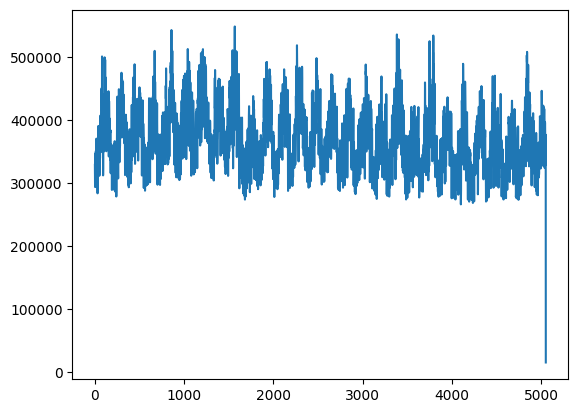

In [9]:
df['Total_AEP_MW'].plot()

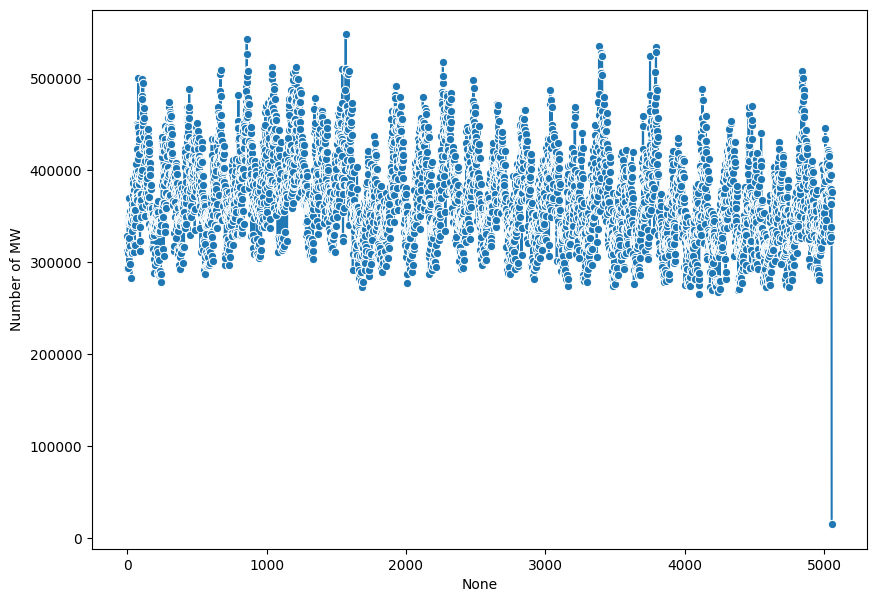

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize = (10,7))
sns.lineplot(data=df, x = df.index, y='Total_AEP_MW',marker ='o')
plt.ylabel('Number of MW')
plt.show()

In [11]:
df =df[:-1]

In [12]:
df.tail()

,Date,Total_AEP_MW
5049,2018-07-29,327792.0
5050,2018-07-30,368834.0
5051,2018-07-31,364327.0
5052,2018-08-01,363628.0
5053,2018-08-02,376504.0


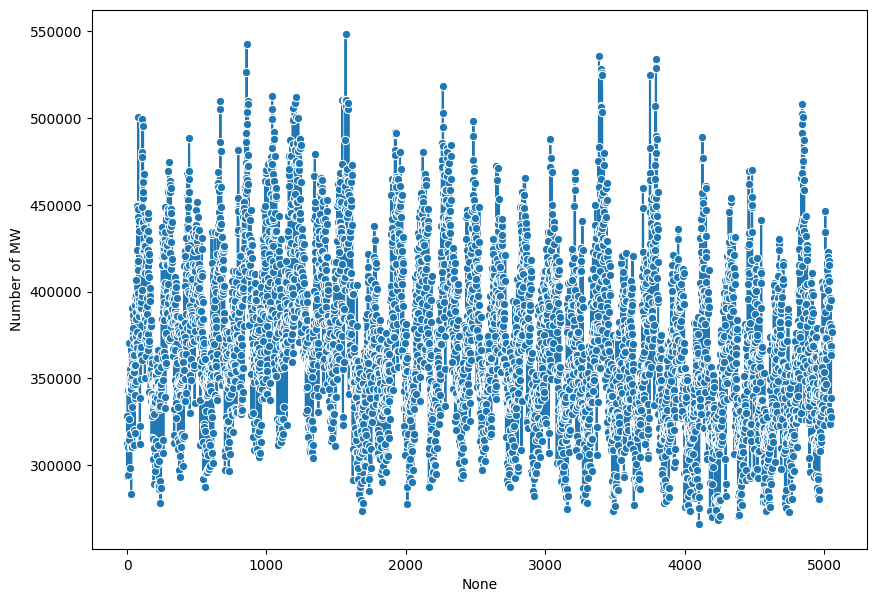

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize = (10,7))
sns.lineplot(data=df, x = df.index, y='Total_AEP_MW',marker ='o')
plt.ylabel('Number of MW')
plt.show()

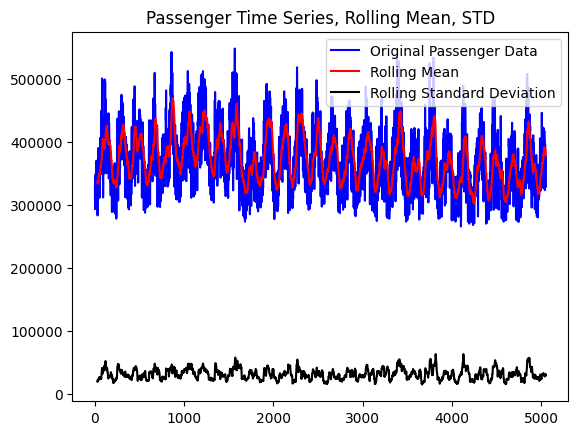

In [14]:
rolling_mean = df['Total_AEP_MW'].rolling(30).mean()
rolling_std = df['Total_AEP_MW'].rolling(30).std()

plt.plot(df['Total_AEP_MW'], color='blue',label='Original Passenger Data')
plt.plot(rolling_mean, color ='red', label='Rolling Mean')
plt.plot(rolling_std, color='black',label='Rolling Standard Deviation')
plt.title('Passenger Time Series, Rolling Mean, STD')
plt.legend(loc='best')
plt.show()

## ADF

In [290]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Total_AEP_MW'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')

ModuleNotFoundError: No module named 'statsmodels'

### Data sudah stasioner

## Autokorelasi

In [23]:
# Load data harian
df = pd.read_csv('AEP_daily_sum.csv')
df =df[:-1]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


<Figure size 1200x500 with 0 Axes>

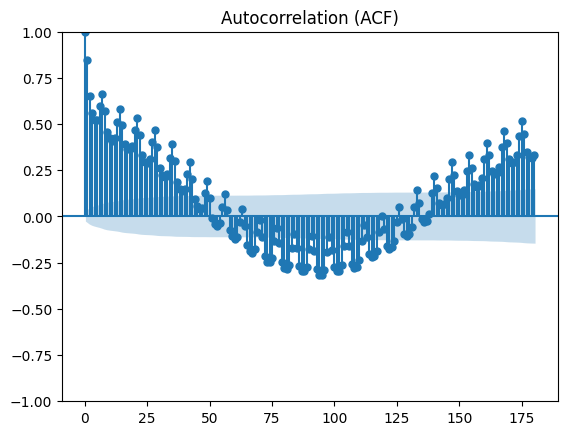

<Figure size 1200x500 with 0 Axes>

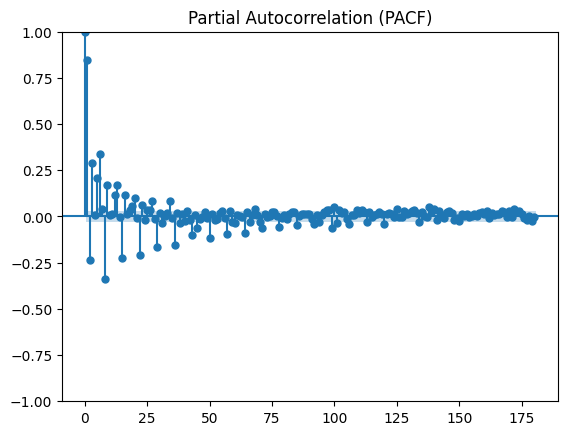

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # Load data harian
# df = pd.read_csv('AEP_daily_sum.csv')
# df =df[:-1]
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Plot ACF dan PACF sampai lag 180 hari
plt.figure(figsize=(12, 5))
plot_acf(df['Total_AEP_MW'], lags=180)
plt.title('Autocorrelation (ACF)')
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(df['Total_AEP_MW'], lags=180)
plt.title('Partial Autocorrelation (PACF)')
plt.show()

### perkiraan p=2, q=2

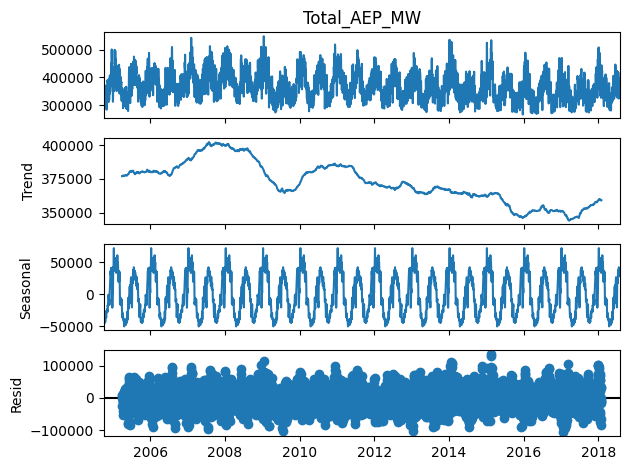

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['Total_AEP_MW'],model='additive',period=365)
decompose.plot()

plt.show()

## Split Data

In [24]:
df['Date'] = df.index

In [25]:
df.head()

,Total_AEP_MW,Date
Date,,
2004-10-01,328544.0,2004-10-01
2004-10-02,311997.0,2004-10-02
2004-10-03,293450.0,2004-10-03
2004-10-04,343417.0,2004-10-04
2004-10-05,346553.0,2004-10-05


C:\Users\71487\AppData\Local\Temp\ipykernel_33212\3054989333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Total_AEP_MW']
C:\Users\71487\AppData\Local\Temp\ipykernel_33212\3054989333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['train'] = test['Total_AEP_MW']


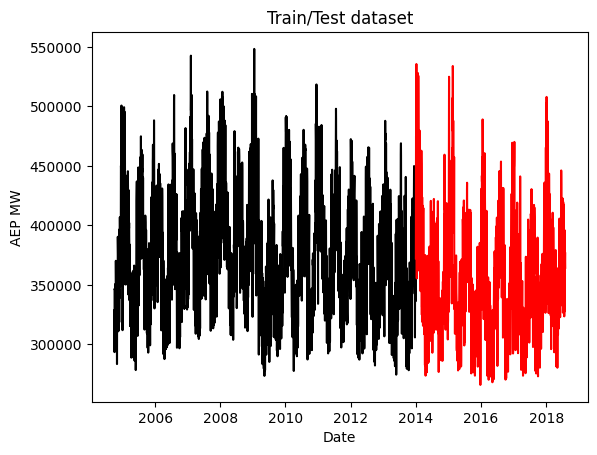

<function matplotlib.pyplot.show(close=None, block=None)>

In [26]:
train=df[df['Date'] < '2014-01-01']
train['train'] = train['Total_AEP_MW']
del train['Date']
del train['Total_AEP_MW']

test =df[df['Date'] >= '2014-01-01']
test['train'] = test['Total_AEP_MW']
del test['Date']
del test['Total_AEP_MW']

plt.plot(train,color='black',label='Train')
plt.plot(test,color='red',label='Test')
plt.title('Train/Test dataset')
plt.ylabel('AEP MW')
plt.xlabel('Date')
plt.show()
plt.show

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['train'], order=(2, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\71487\Downloads\MT DATA 20\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\71487\Downloads\MT DATA 20\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\71487\Downloads\MT DATA 20\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\71487\Downloads\MT DATA 20\myvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  train   No. Observations:                 3379
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -38721.823
Date:                Thu, 19 Jun 2025   AIC                          77453.645
Time:                        14:05:31   BIC                          77484.270
Sample:                    10-01-2004   HQIC                         77464.595
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5132      0.030     17.245      0.000       0.455       0.572
ar.L2         -0.1629      0.026     -6.243      0.000      -0.214      -0.112
ma.L1         -0.4580      0.028    -16.570      0.0

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

forecast = model_fit.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test['train'], forecast))
print(f'RMSE: {rmse:.2f}')

RMSE: 50106.41


In [293]:
relative_error = 50105.41 / y_test_orig.mean()
print(f'Relative RMSE: {relative_error:.2%}')

Relative RMSE: 14.13%


In [ ]:
df.describe()
print(df.max()-df.min())

Total_AEP_MW              282476.0
Date            5053 days 00:00:00
dtype: object


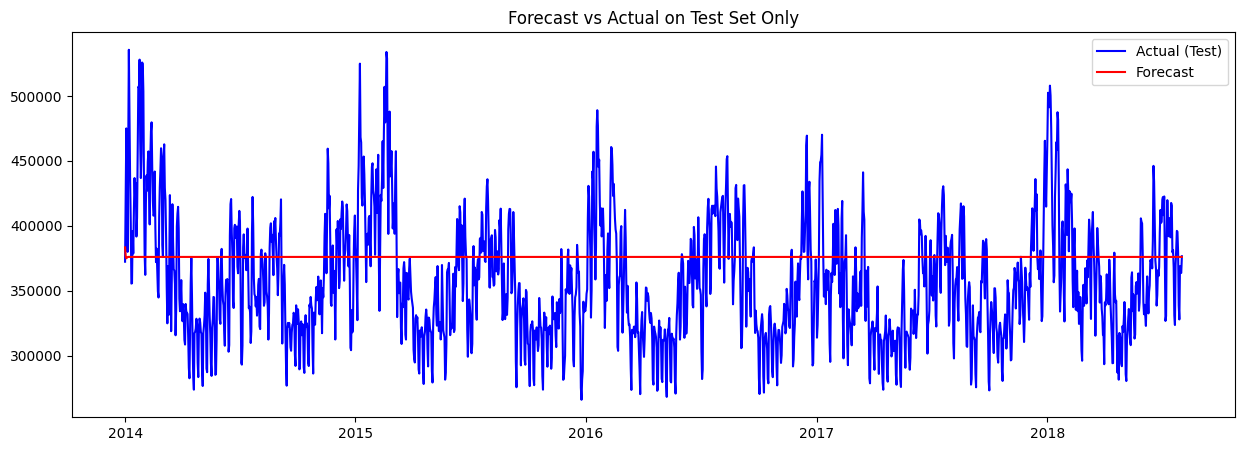

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(test.index, test['train'], label='Actual (Test)', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Forecast vs Actual on Test Set Only')
plt.legend()
plt.show()

## Neural Network

In [75]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()

def create_lag_features(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 30
train_scaled = scaler.fit_transform(train[['train']])
test_scaled = scaler.transform(test[['train']])

X_train, y_train = create_lag_features(train_scaled, lookback)
X_test, y_test = create_lag_features(test_scaled, lookback)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(lookback,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # output 1 hari ke depan

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0146
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048
Epoch 9/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046
Epoch 10/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046
Epoch 11/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050
Epoch 12/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047
Epoch 13/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044
Epoch 14/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042
Epoch 15/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [78]:
import numpy as np
from sklearn.metrics import mean_squared_error
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
print(f'RMSE: {rmse:.2f}')

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 18503.98


In [79]:
relative_error = rmse / y_test_orig.mean()
print(f'Relative RMSE: {relative_error:.2%}')

Relative RMSE: 5.20%


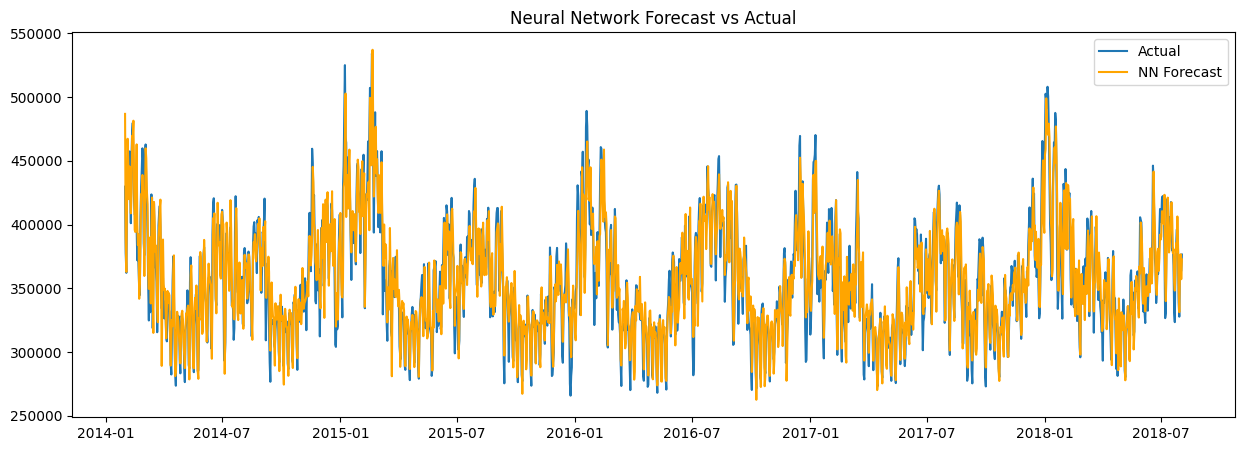

In [80]:
plt.figure(figsize=(15,5))
plt.plot(test.index[lookback:], y_test_orig, label='Actual')
plt.plot(test.index[lookback:], y_pred, label='NN Forecast', color='orange')
plt.title('Neural Network Forecast vs Actual')
plt.legend()
plt.show()

## LTSM

In [84]:
# Load data harian
df = pd.read_csv('AEP_daily_sum.csv')
df =df[:-1]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.head())

            Total_AEP_MW
Date                    
2004-10-01      328544.0
2004-10-02      311997.0
2004-10-03      293450.0
2004-10-04      343417.0
2004-10-05      346553.0


In [85]:
df['Date'] = df.index

In [86]:
train=df[df['Date'] < '2014-01-01']
train['train'] = train['Total_AEP_MW']
del train['Date']
del train['Total_AEP_MW']

test =df[df['Date'] >= '2014-01-01']
test['train'] = test['Total_AEP_MW']
del test['Date']
del test['Total_AEP_MW']

C:\Users\71487\AppData\Local\Temp\ipykernel_33212\2714732306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Total_AEP_MW']
C:\Users\71487\AppData\Local\Temp\ipykernel_33212\2714732306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['train'] = test['Total_AEP_MW']


In [122]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['train']])
test_scaled = scaler.transform(test[['train']])

In [192]:
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 30
X_train, y_train = create_sequences(train_scaled, lookback)
X_test, y_test = create_sequences(test_scaled, lookback)

In [193]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
# model = Sequential()
# model.add(LSTM(64, activation='relu', input_shape=(lookback, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(lookback, 1)))
model.add(LSTM(32, activation='relu', return_sequences=True))  # penting!
model.add(LSTM(16, activation='relu'))  # terakhir, return_sequences=False (default)
model.add(Dense(1))


optimizer = Adam(learning_rate=0.001)  # contoh: learning rate lebih kecil
model.compile(optimizer=optimizer, loss='mse')
# model.compile(optimizer='adam', loss='mse')

c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [194]:
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

Epoch 1/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1075
Epoch 2/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0174
Epoch 3/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0173
Epoch 4/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0163
Epoch 5/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0152
Epoch 6/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0152
Epoch 7/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0160
Epoch 8/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0153
Epoch 9/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0159
Epoch 10/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0144
Epoch 11/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0157
Epoch 12/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0148
Epoch 13/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0142
Epoch 14/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0140
Epoch 15/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s

In [195]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [196]:
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 22717.48


In [183]:
relative_error = rmse / y_test_orig.mean()
print(f'Relative RMSE: {relative_error:.2%}')

Relative RMSE: 5.25%


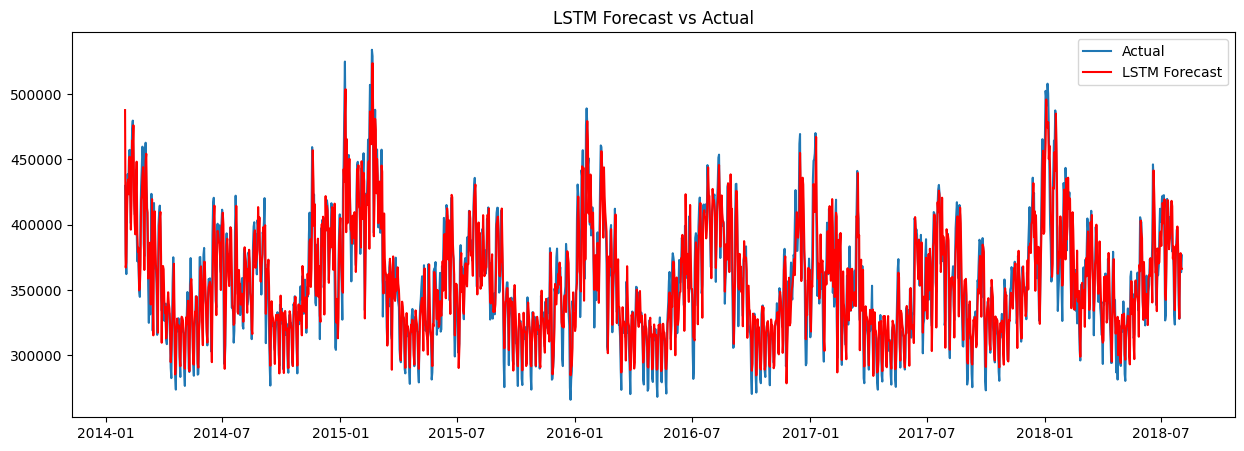

In [162]:
plt.figure(figsize=(15,5))
plt.plot(test.index[lookback:], y_test_orig, label='Actual')
plt.plot(test.index[lookback:], y_pred, label='LSTM Forecast', color='red')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()

## Prophet

In [185]:
from prophet import Prophet
import pandas as pd

# Load dan siapkan data
df = pd.read_csv("AEP_daily_sum.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[:-1]

# Rename kolom sesuai format Prophet
df = df.rename(columns={'Date': 'ds', 'Total_AEP_MW': 'y'})

c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [187]:
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df)

15:05:48 - cmdstanpy - INFO - Chain [1] start processing
15:05:50 - cmdstanpy - INFO - Chain [1] done processing


In [188]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

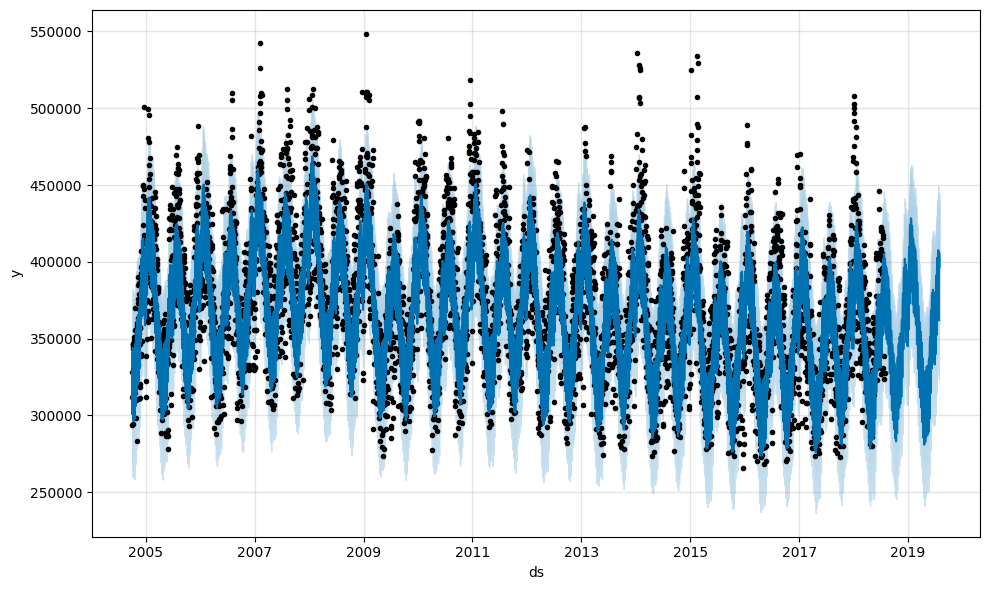

In [189]:
fig1 = model.plot(forecast)

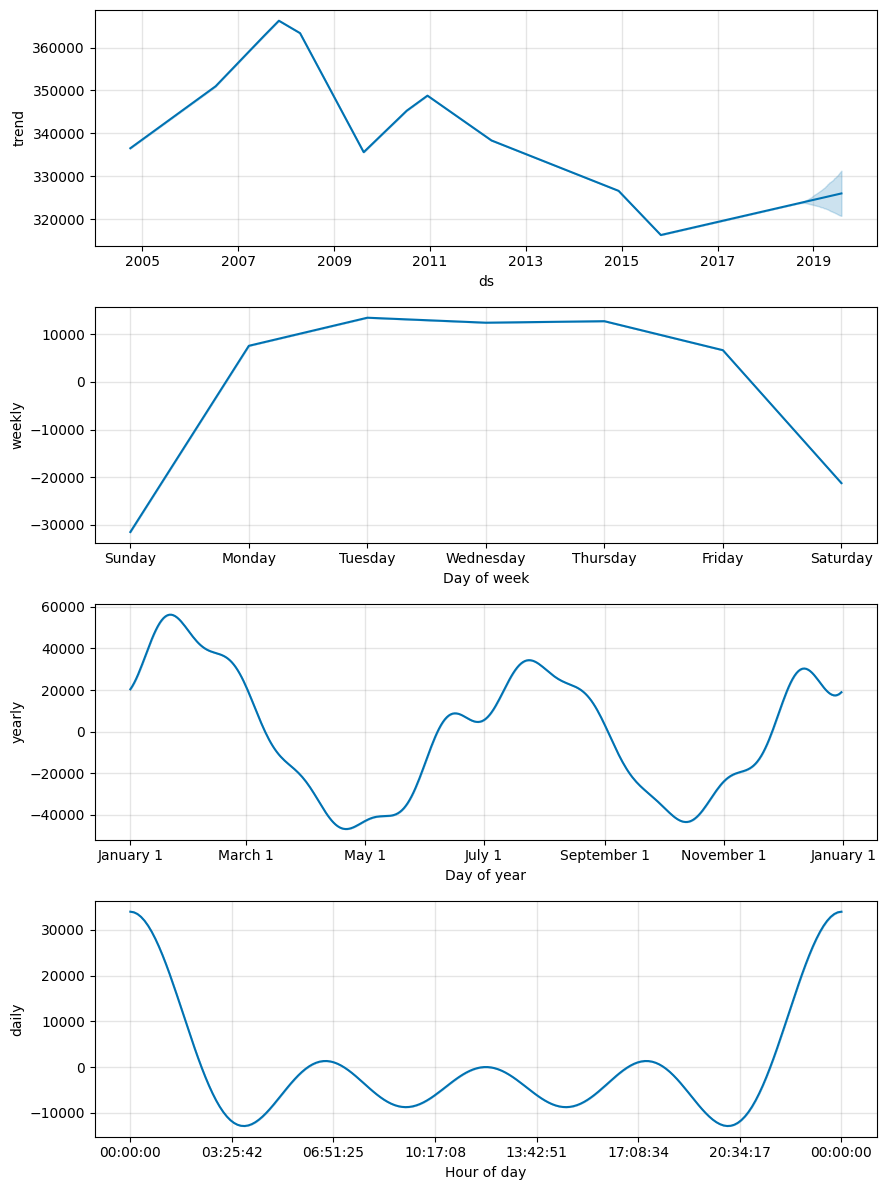

In [190]:
fig2 = model.plot_components(forecast)

In [191]:
test = df[df['ds'] >= '2014-01-01'].copy()
pred = forecast[forecast['ds'] >= '2014-01-01'][['ds', 'yhat']]

# Merge untuk bandingkan y vs yhat
merged = test.merge(pred, on='ds')
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
print(f'RMSE: {rmse:.2f}')

RMSE: 31884.45


In [294]:
relative_error = 31884.45 / y_test_orig.mean()
print(f'Relative RMSE: {relative_error:.2%}')

Relative RMSE: 8.99%


## Testing Split Interval

In [237]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
# Load dan siapkan data
df = pd.read_csv("AEP_daily_sum.csv")
df['Date'] = pd.to_datetime(df['Date'])
df=df[:-1]
df.set_index('Date', inplace=True)
df = df.rename(columns={'Total_AEP_MW': 'value'})

# Split: latih model untuk data sebelum 2014
train = df[df.index < '2014-01-01'][['value']]
test = df[(df.index >= '2014-01-01') & (df.index < '2015-01-01')][['value']]

# Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Fungsi bantu: sequence
def create_sequences(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 30
X_train, y_train = create_sequences(train_scaled, lookback)
X_test, y_test = create_sequences(test_scaled, lookback)

# Reshape ke 3D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Bangun model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(lookback, 1)))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.0004)
model.compile(optimizer=optimizer, loss='mse')
# model.compile(optimizer='adam', loss='mse')

# Latih model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Prediksi
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)

# Evaluasi
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
print(f'📉 RMSE pada tahun 2014: {rmse:.2f}')

Epoch 1/100


c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0864
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0203
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0191
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0200
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0195
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0191
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0172
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0175
Epoch 9/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0175
Epoch 10/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0167
Epoch 11/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0167
Epoch 12/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0182
Epoch 13/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0171
Epoch 14/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0168
Epoch 15/100
105/105 ━━━━━━━━━━━━━━━━━━━━

In [295]:
relative_error = 23807 / y_test_orig.mean()
print(f'Relative RMSE: {relative_error:.2%}')

Relative RMSE: 6.71%


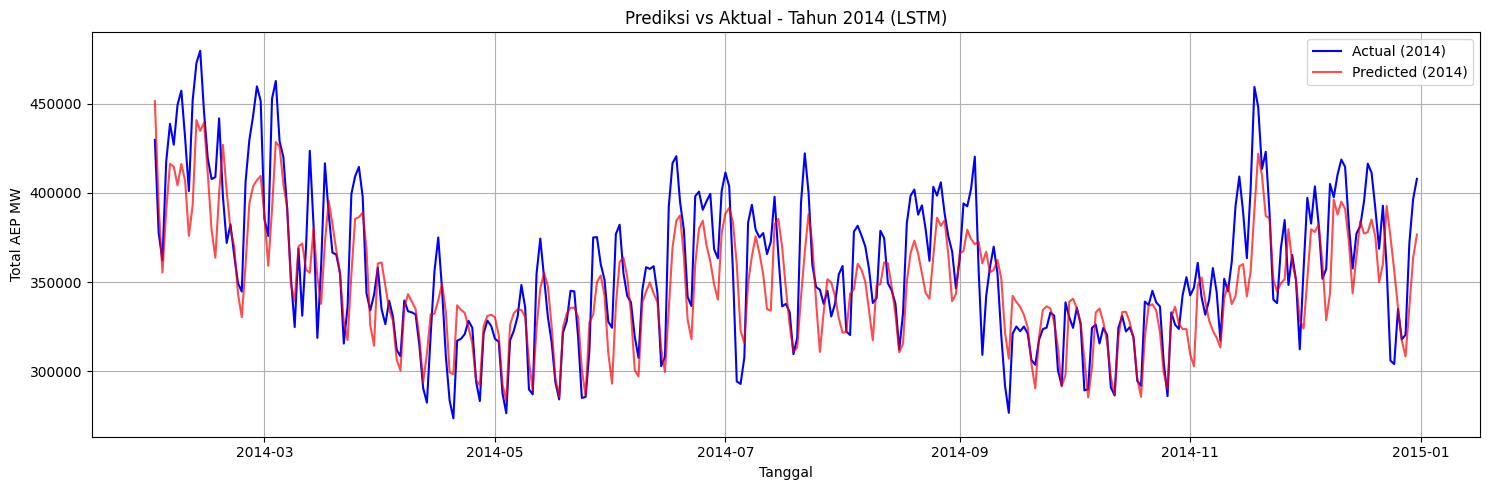

In [238]:
dates_2014 = test.index[lookback:]
plt.figure(figsize=(15, 5))
plt.plot(dates_2014, y_test_orig, label='Actual (2014)', color='blue')
plt.plot(dates_2014, y_pred, label='Predicted (2014)', color='red', alpha=0.7)
plt.title('Prediksi vs Aktual - Tahun 2014 (LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Total AEP MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ANN testing split interval waktu

In [245]:
df = pd.read_csv("AEP_daily_sum.csv")
df['Date'] = pd.to_datetime(df['Date'])
df=df[:-1]
df.set_index('Date', inplace=True)
df = df.rename(columns={'Total_AEP_MW': 'value'})

# Split data
train = df[df.index < '2014-01-01'][['value']]
test = df[(df.index >= '2014-01-01') & (df.index < '2015-01-01')][['value']]

# Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Sequence creator
def create_ann_sequences(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i].flatten())
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 30
X_train, y_train = create_ann_sequences(train_scaled, lookback)
X_test, y_test = create_ann_sequences(test_scaled, lookback)

# ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(lookback,)))
model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

# Predict and evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))

print(f"📉 RMSE ANN tahun 2014: {rmse:.2f}")

Epoch 1/150


c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1302 
Epoch 2/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0180
Epoch 3/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158
Epoch 4/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135
Epoch 5/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127
Epoch 6/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0119
Epoch 7/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112
Epoch 8/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110
Epoch 9/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098
Epoch 10/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 11/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083
Epoch 12/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 13/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076
Epoch 14/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071
Epoch 15/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [296]:
relative_error = 18186.03 / y_test_orig.mean()
print(f'Relative RMSE: {relative_error:.2%}')

Relative RMSE: 5.13%


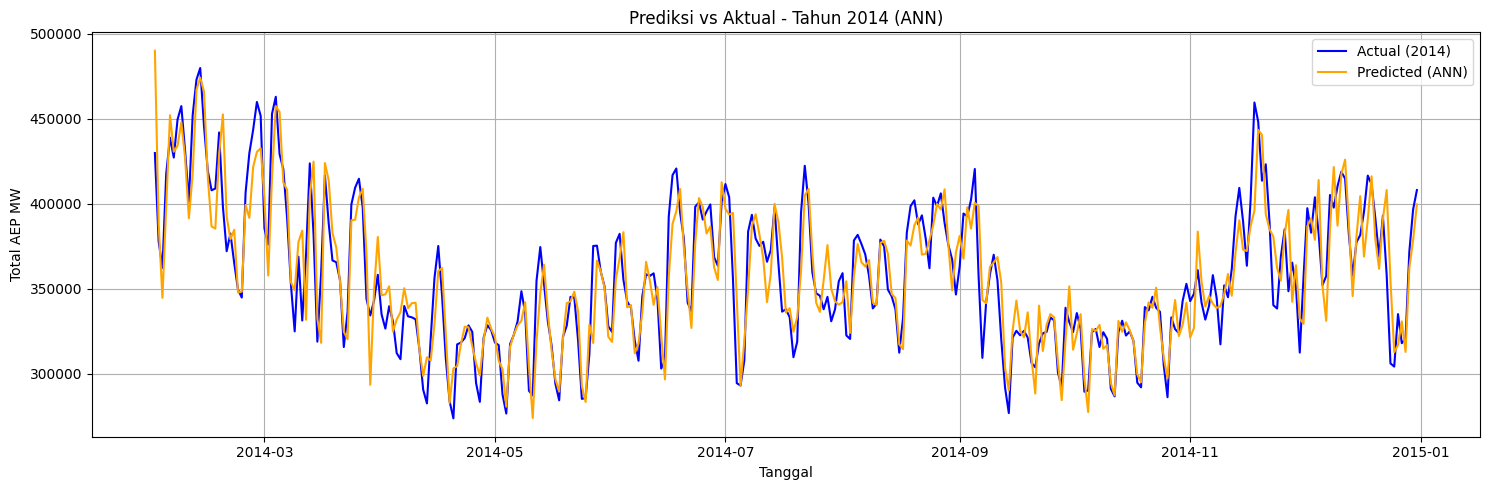

In [246]:
dates = test.index[lookback:]

# Plot hasil
plt.figure(figsize=(15, 5))
plt.plot(dates, y_test_orig, label='Actual (2014)', color='blue')
plt.plot(dates, y_pred, label='Predicted (ANN)', color='orange')
plt.title('Prediksi vs Aktual - Tahun 2014 (ANN)')
plt.xlabel('Tanggal')
plt.ylabel('Total AEP MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [247]:
df = pd.read_csv("AEP_daily_sum.csv")
df['Date'] = pd.to_datetime(df['Date'])
df=df[:-1]
df.set_index('Date', inplace=True)
df = df.rename(columns={'Total_AEP_MW': 'value'})

# Split data
train = df[df.index < '2014-01-01'][['value']]
test = df[(df.index >= '2015-01-01') & (df.index < '2016-01-01')][['value']]

# Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Sequence creator
def create_ann_sequences(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i].flatten())
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 30
X_train, y_train = create_ann_sequences(train_scaled, lookback)
X_test, y_test = create_ann_sequences(test_scaled, lookback)

# ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(lookback,)))
model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

# Predict and evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))

print(f"📉 RMSE ANN tahun 2013: {rmse:.2f}")

Epoch 1/150


c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0541  
Epoch 2/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0145
Epoch 3/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0124
Epoch 4/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0101
Epoch 5/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092
Epoch 6/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092
Epoch 7/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085
Epoch 8/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082
Epoch 9/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079
Epoch 10/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074
Epoch 11/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071
Epoch 12/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068
Epoch 13/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069
Epoch 14/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062
Epoch 15/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [301]:
relative_error = 16197.32 / y_test_orig.mean()
print(f'Relative RMSE: {relative_error:.2%}')

Relative RMSE: 4.69%


In [248]:
df = pd.read_csv("AEP_daily_sum.csv")
df['Date'] = pd.to_datetime(df['Date'])
df=df[:-1]
df.set_index('Date', inplace=True)
df = df.rename(columns={'Total_AEP_MW': 'value'})

# Split data
train = df[df.index < '2014-01-01'][['value']]
test = df[(df.index >= '2016-01-01') & (df.index < '2017-01-01')][['value']]

# Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Sequence creator
def create_ann_sequences(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i].flatten())
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 30
X_train, y_train = create_ann_sequences(train_scaled, lookback)
X_test, y_test = create_ann_sequences(test_scaled, lookback)

# ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(lookback,)))
model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

# Predict and evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))

print(f"📉 RMSE ANN tahun 2016: {rmse:.2f}")

Epoch 1/150


c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0884 
Epoch 2/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189
Epoch 3/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145
Epoch 4/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127
Epoch 5/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092
Epoch 6/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0084
Epoch 7/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080
Epoch 8/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075
Epoch 9/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071
Epoch 10/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070
Epoch 11/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070
Epoch 12/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069
Epoch 13/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063
Epoch 14/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063
Epoch 15/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [299]:
df = pd.read_csv("AEP_daily_sum.csv")
df['Date'] = pd.to_datetime(df['Date'])
df=df[:-1]
df.set_index('Date', inplace=True)
df = df.rename(columns={'Total_AEP_MW': 'value'})

# Split data
train = df[df.index < '2014-01-01'][['value']]
test = df[(df.index >= '2017-01-01') & (df.index < '2018-01-01')][['value']]

# Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Sequence creator
def create_ann_sequences(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i].flatten())
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 30
X_train, y_train = create_ann_sequences(train_scaled, lookback)
X_test, y_test = create_ann_sequences(test_scaled, lookback)

# ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(lookback,)))
model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

# Predict and evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))

print(f"📉 RMSE ANN tahun 2017: {rmse:.2f}")

Epoch 1/150


c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2660 
Epoch 2/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0216
Epoch 3/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186
Epoch 4/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158
Epoch 5/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138
Epoch 6/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0117
Epoch 7/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0104
Epoch 8/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099
Epoch 9/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092
Epoch 10/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 11/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 12/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077
Epoch 13/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071
Epoch 14/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068
Epoch 15/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

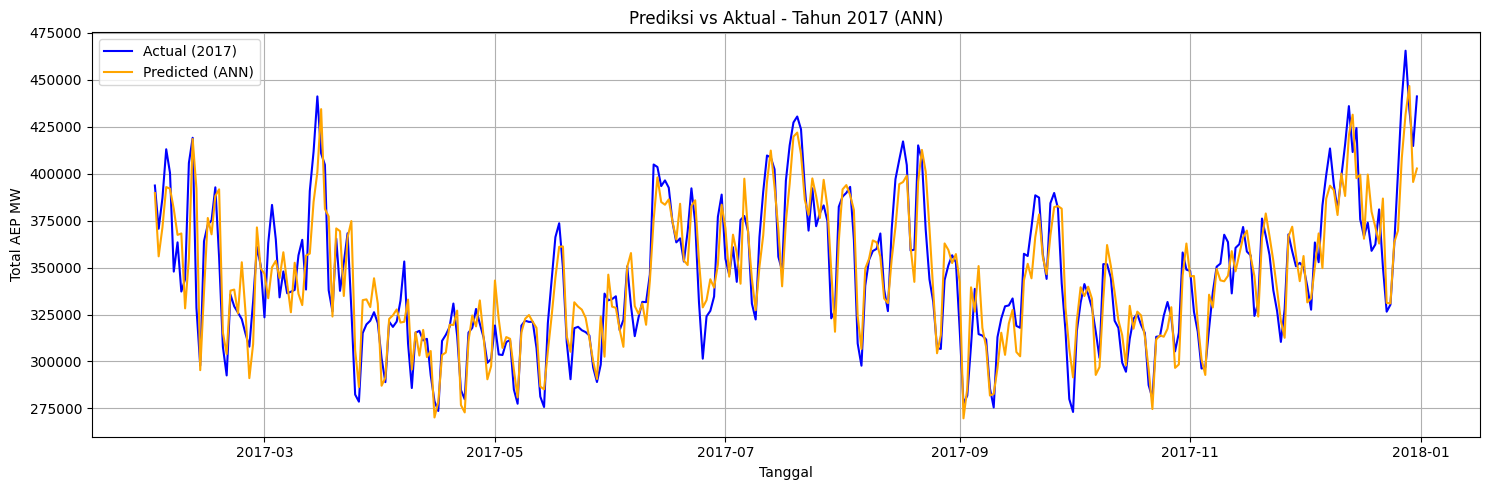

In [300]:
dates = test.index[lookback:]

# Plot prediksi vs aktual
plt.figure(figsize=(15, 5))
plt.plot(dates, y_test_orig, label='Actual (2017)', color='blue')
plt.plot(dates, y_pred, label='Predicted (ANN)', color='orange')
plt.title('Prediksi vs Aktual - Tahun 2017 (ANN)')
plt.xlabel('Tanggal')
plt.ylabel('Total AEP MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [302]:
df = pd.read_csv("AEP_daily_sum.csv")
df['Date'] = pd.to_datetime(df['Date'])
df=df[:-1]
df.set_index('Date', inplace=True)
df = df.rename(columns={'Total_AEP_MW': 'value'})

# Split data
train = df[df.index < '2014-01-01'][['value']]
test = df[(df.index >= '2018-01-01')][['value']]

# Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Sequence creator
def create_ann_sequences(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i].flatten())
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 30
X_train, y_train = create_ann_sequences(train_scaled, lookback)
X_test, y_test = create_ann_sequences(test_scaled, lookback)

# ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(lookback,)))
model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

# Predict and evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))

print(f"📉 RMSE ANN tahun 2018: {rmse:.2f}")

Epoch 1/150


c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2878 
Epoch 2/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0234
Epoch 3/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0205
Epoch 4/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0160
Epoch 5/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134
Epoch 6/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115
Epoch 7/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0106 
Epoch 8/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091
Epoch 9/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081
Epoch 10/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085
Epoch 11/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079
Epoch 12/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071
Epoch 13/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069
Epoch 14/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067
Epoch 15/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [303]:
relative_error =17923.32/ y_test_orig.mean()
print(f'Relative RMSE: {relative_error:.2%}')

Relative RMSE: 5.01%


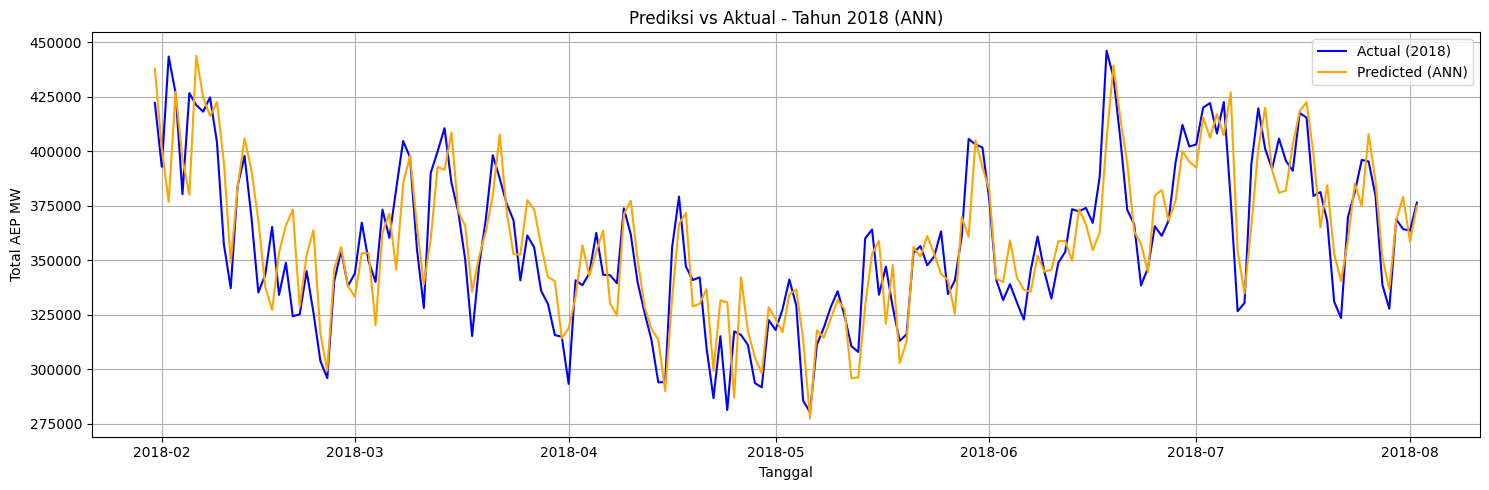

In [305]:
dates = test.index[lookback:]

# Plot prediksi vs aktual
plt.figure(figsize=(15, 5))
plt.plot(dates, y_test_orig, label='Actual (2018)', color='blue')
plt.plot(dates, y_pred, label='Predicted (ANN)', color='orange')
plt.title('Prediksi vs Aktual - Tahun 2018 (ANN)')
plt.xlabel('Tanggal')
plt.ylabel('Total AEP MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [271]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
df = pd.read_csv("AEP_daily_sum.csv")
df['Date'] = pd.to_datetime(df['Date'])
df=df[:-1]
df.set_index('Date', inplace=True)
df = df.rename(columns={'Total_AEP_MW': 'value'})

# Split data
train = df[df.index < '2014-01-01'][['value']]
test = df[(df.index >= '2014-01-01') & (df.index < '2015-01-01')][['value']]

# Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Sequence creator
def create_ann_sequences(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i].flatten())
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 30
X_train, y_train = create_ann_sequences(train_scaled, lookback)
X_test, y_test = create_ann_sequences(test_scaled, lookback)

# ANN model
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6)

model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(lookback,)))
model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)

# Predict and evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))

print(f"📉 RMSE ANN tahun 2014: {rmse:.2f}")

Epoch 1/200


c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0720 - learning_rate: 1.0000e-04
Epoch 2/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 - learning_rate: 1.0000e-04
Epoch 3/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0113 - learning_rate: 1.0000e-04
Epoch 4/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097 - learning_rate: 1.0000e-04
Epoch 5/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084 - learning_rate: 1.0000e-04
Epoch 6/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 - learning_rate: 1.0000e-04
Epoch 7/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073 - learning_rate: 1.0000e-04
Epoch 8/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 - learning_rate: 1.0000e-04
Epoch 9/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 - learning_rate: 1.0000e-04
Epoch 10/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - learning_rate: 1.0000e-04
Epoch 11/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

## ALL interval ANN

In [316]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
df = pd.read_csv("AEP_daily_sum.csv")
df['Date'] = pd.to_datetime(df['Date'])
df=df[:-1]
df.set_index('Date', inplace=True)
df = df.rename(columns={'Total_AEP_MW': 'value'})

# Split data
train = df[df.index < '2014-01-01'][['value']]
test = df[(df.index >= '2014-01-01')][['value']]

# Scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Sequence creator
def create_ann_sequences(data, lookback=30):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i].flatten())
        y.append(data[i])
    return np.array(X), np.array(y)

lookback = 60
X_train, y_train = create_ann_sequences(train_scaled, lookback)
X_test, y_test = create_ann_sequences(test_scaled, lookback)

# ANN model
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6)

model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(lookback,)))
model.add(Dense(64, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train
model.fit(X_train, y_train, epochs=200, batch_size=30, verbose=1)

# Predict and evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))

print(f"📉 RMSE ANN tahun 2014: {rmse:.2f}")

Epoch 1/200


c:\Users\71487\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1335 
Epoch 2/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0302
Epoch 3/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0213
Epoch 4/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0171
Epoch 5/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147
Epoch 6/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128
Epoch 7/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0113
Epoch 8/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099
Epoch 9/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 10/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 11/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076
Epoch 12/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073
Epoch 13/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068
Epoch 14/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069
Epoch 15/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 